<a href="https://colab.research.google.com/github/sanulisiya/Telco-churn-prediction20231263/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [317]:
# ============================
# Standard Data Manipulation
# ============================
import pandas as pd
import numpy as np

# ============================
# Visualization Libraries
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# ============================
# Scikit-learn (Task 2)
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

# ============================
# TensorFlow / Keras (Neural Network)
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ============================
# Ignore Warnings for Cleaner Output
# ============================
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")

# Add these to your imports section at the beginning:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


All libraries imported successfully!


Load the dataset


In [318]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print("Data set is Succesfully Loaded")
print("\nFirst 5 rows of the dataset:")
df.head()

Data set is Succesfully Loaded

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Inspection

In [319]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("== DATASET INFO ==")
df.info()

== DATASET INFO ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

**Task 1**


Exploratory Data Analysis (EDA)

Missing Values

In [320]:
# Check missing values
missing = df.isnull().sum()

if missing.sum() == 0:
    print(" No missing values!")
else:
    missing_df = pd.DataFrame({
        'Missing': missing[missing > 0],
        'Percent': (missing[missing > 0] / len(df) * 100).round(2)
    })
    print(missing_df)

 No missing values!


Check for Duplicates

In [321]:
import pandas as pd

# Check for duplicate rows and calculate the percentage
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100

print(f"\nTotal duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")

if duplicates > 0:
    print("\nDuplicate rows found!")
    display(df[df.duplicated()].head())  # Display a few duplicate rows
else:
    print("No duplicate rows found!")



Total duplicate rows: 0
Percentage of duplicates: 0.00%
No duplicate rows found!


Numerical column Summery

In [322]:
# 3. Get statistical summary of numerical columns
print("== NUMERICAL COLUMNS STATISTICS ==")
df.describe()

== NUMERICAL COLUMNS STATISTICS ==


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Numerical Features Analysis

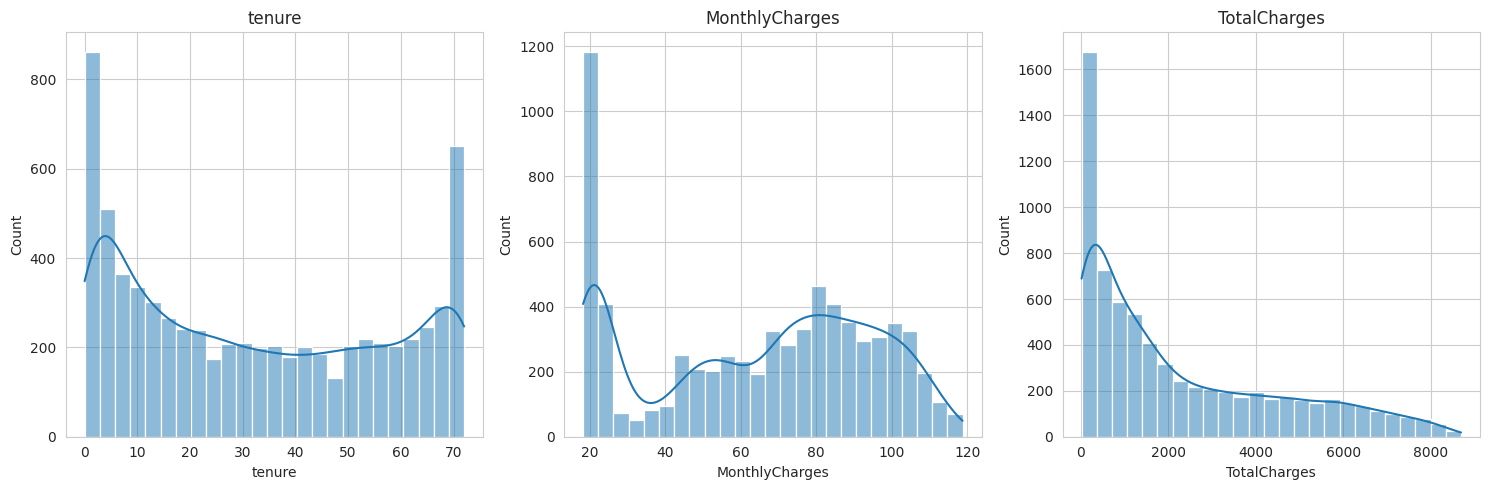

In [323]:
# Simple 3-feature histograms
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=25)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

BOXPLOTS OF NUMERICAL FEATURES

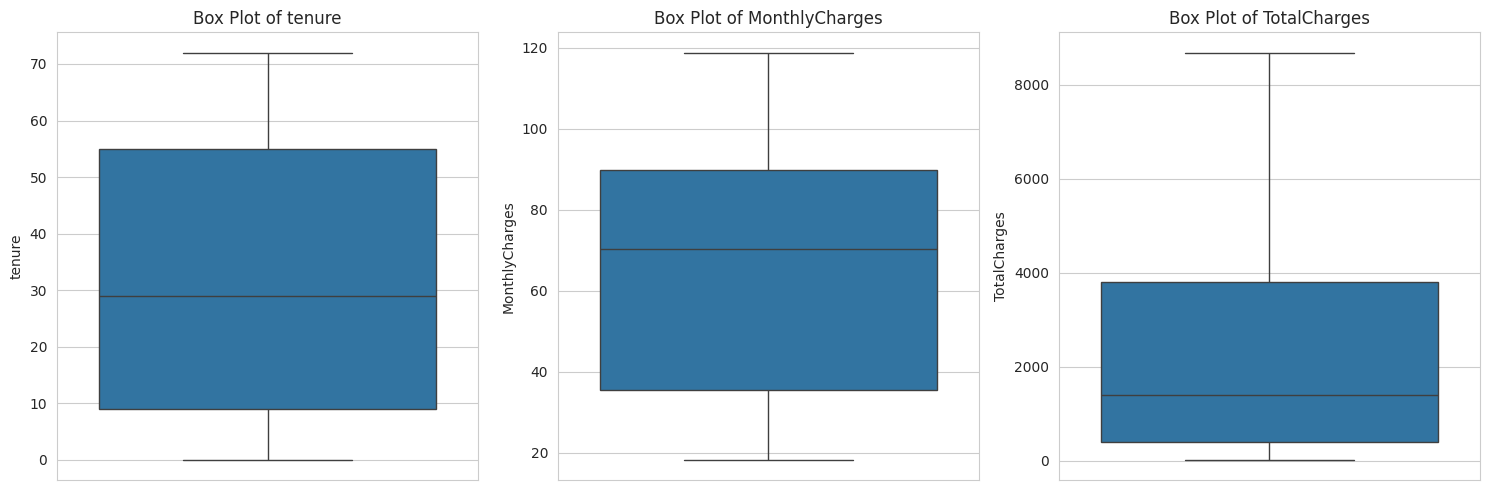

In [324]:
# BOX PLOTS FOR NUMERICAL FEATURES
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(num_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Categorical Columns check

In [325]:
# 4. Check categorical columns
print("== CATEGORICAL COLUMNS ==")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

== CATEGORICAL COLUMNS ==
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Categorical Features Analysis

Distribution Without the Churn Split

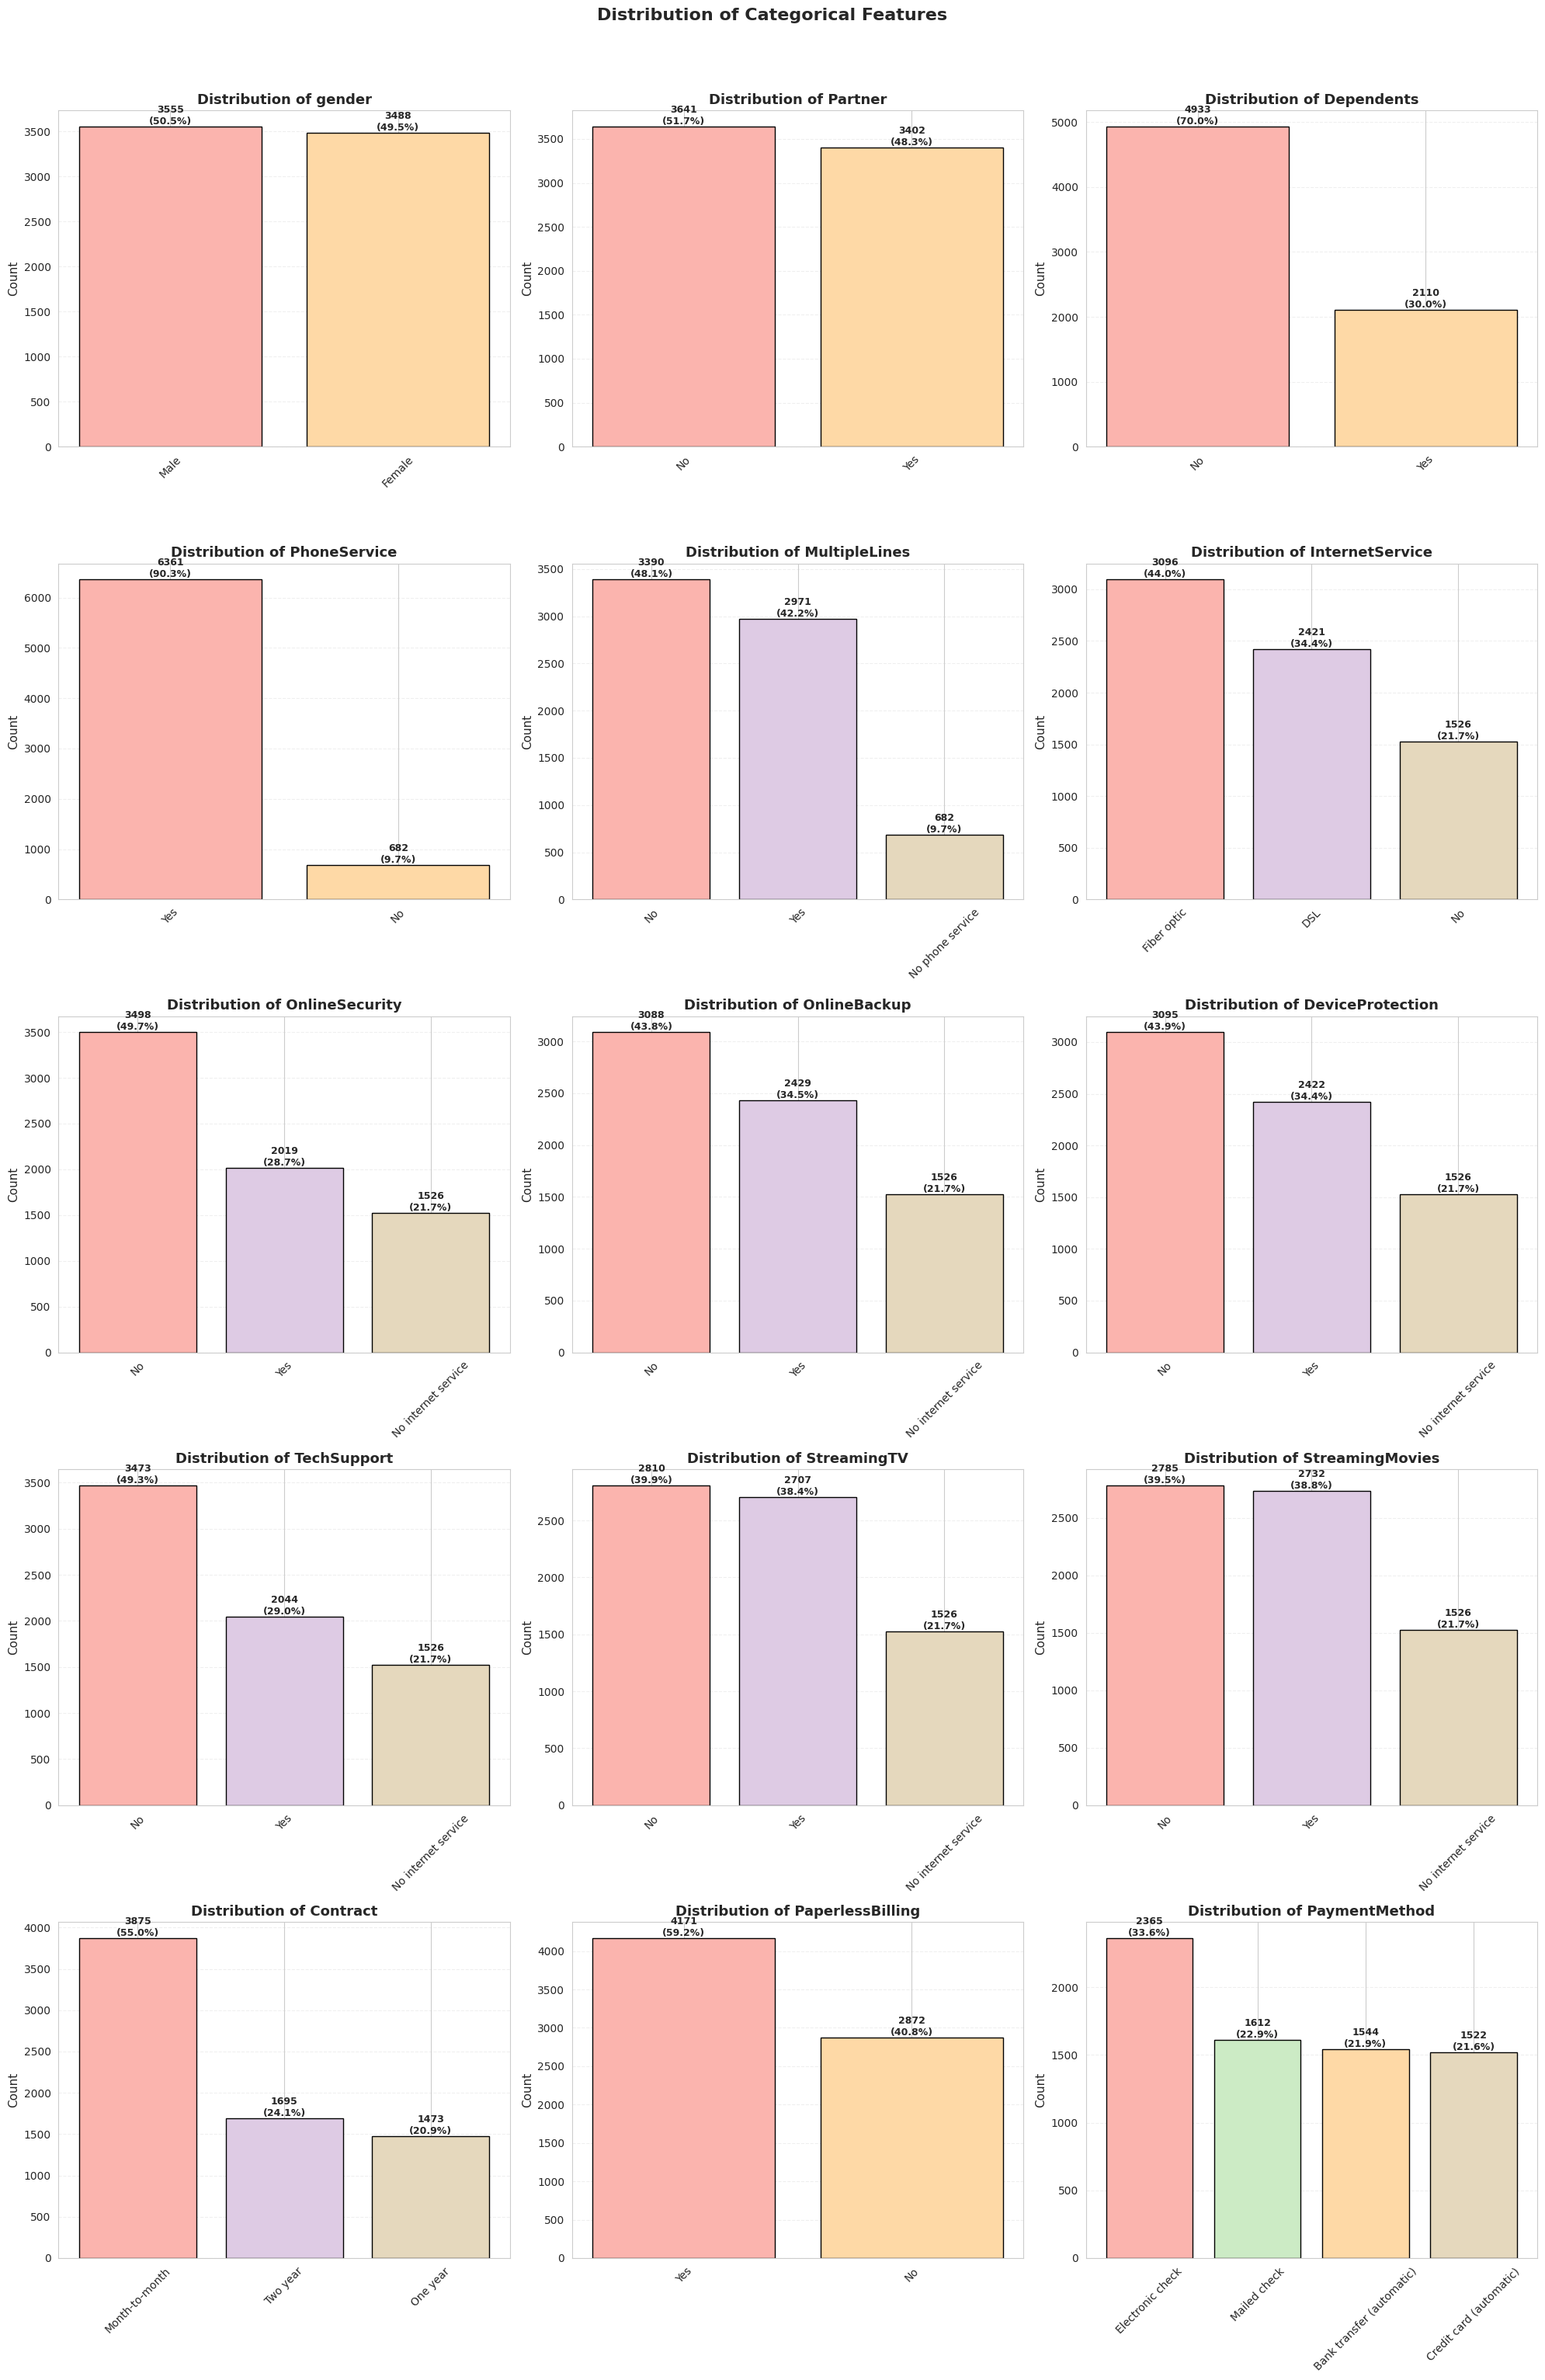

In [326]:
# Bar plots with percentages
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    ax = axes[idx]

    # Get value counts and percentages
    counts = df[col].value_counts()
    percentages = (counts / len(df) * 100).round(1)

    # Create bar plot with better colors
    colors = plt.cm.Pastel1(np.arange(len(counts)) / len(counts))
    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='black')

    # Formatting
    ax.set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add count and percentage labels
    for i, (bar, count, percent) in enumerate(zip(bars, counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{count}\n({percent}%)', ha='center', va='bottom',
               fontsize=9, fontweight='bold')

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

iDistribution Without the Churn Split

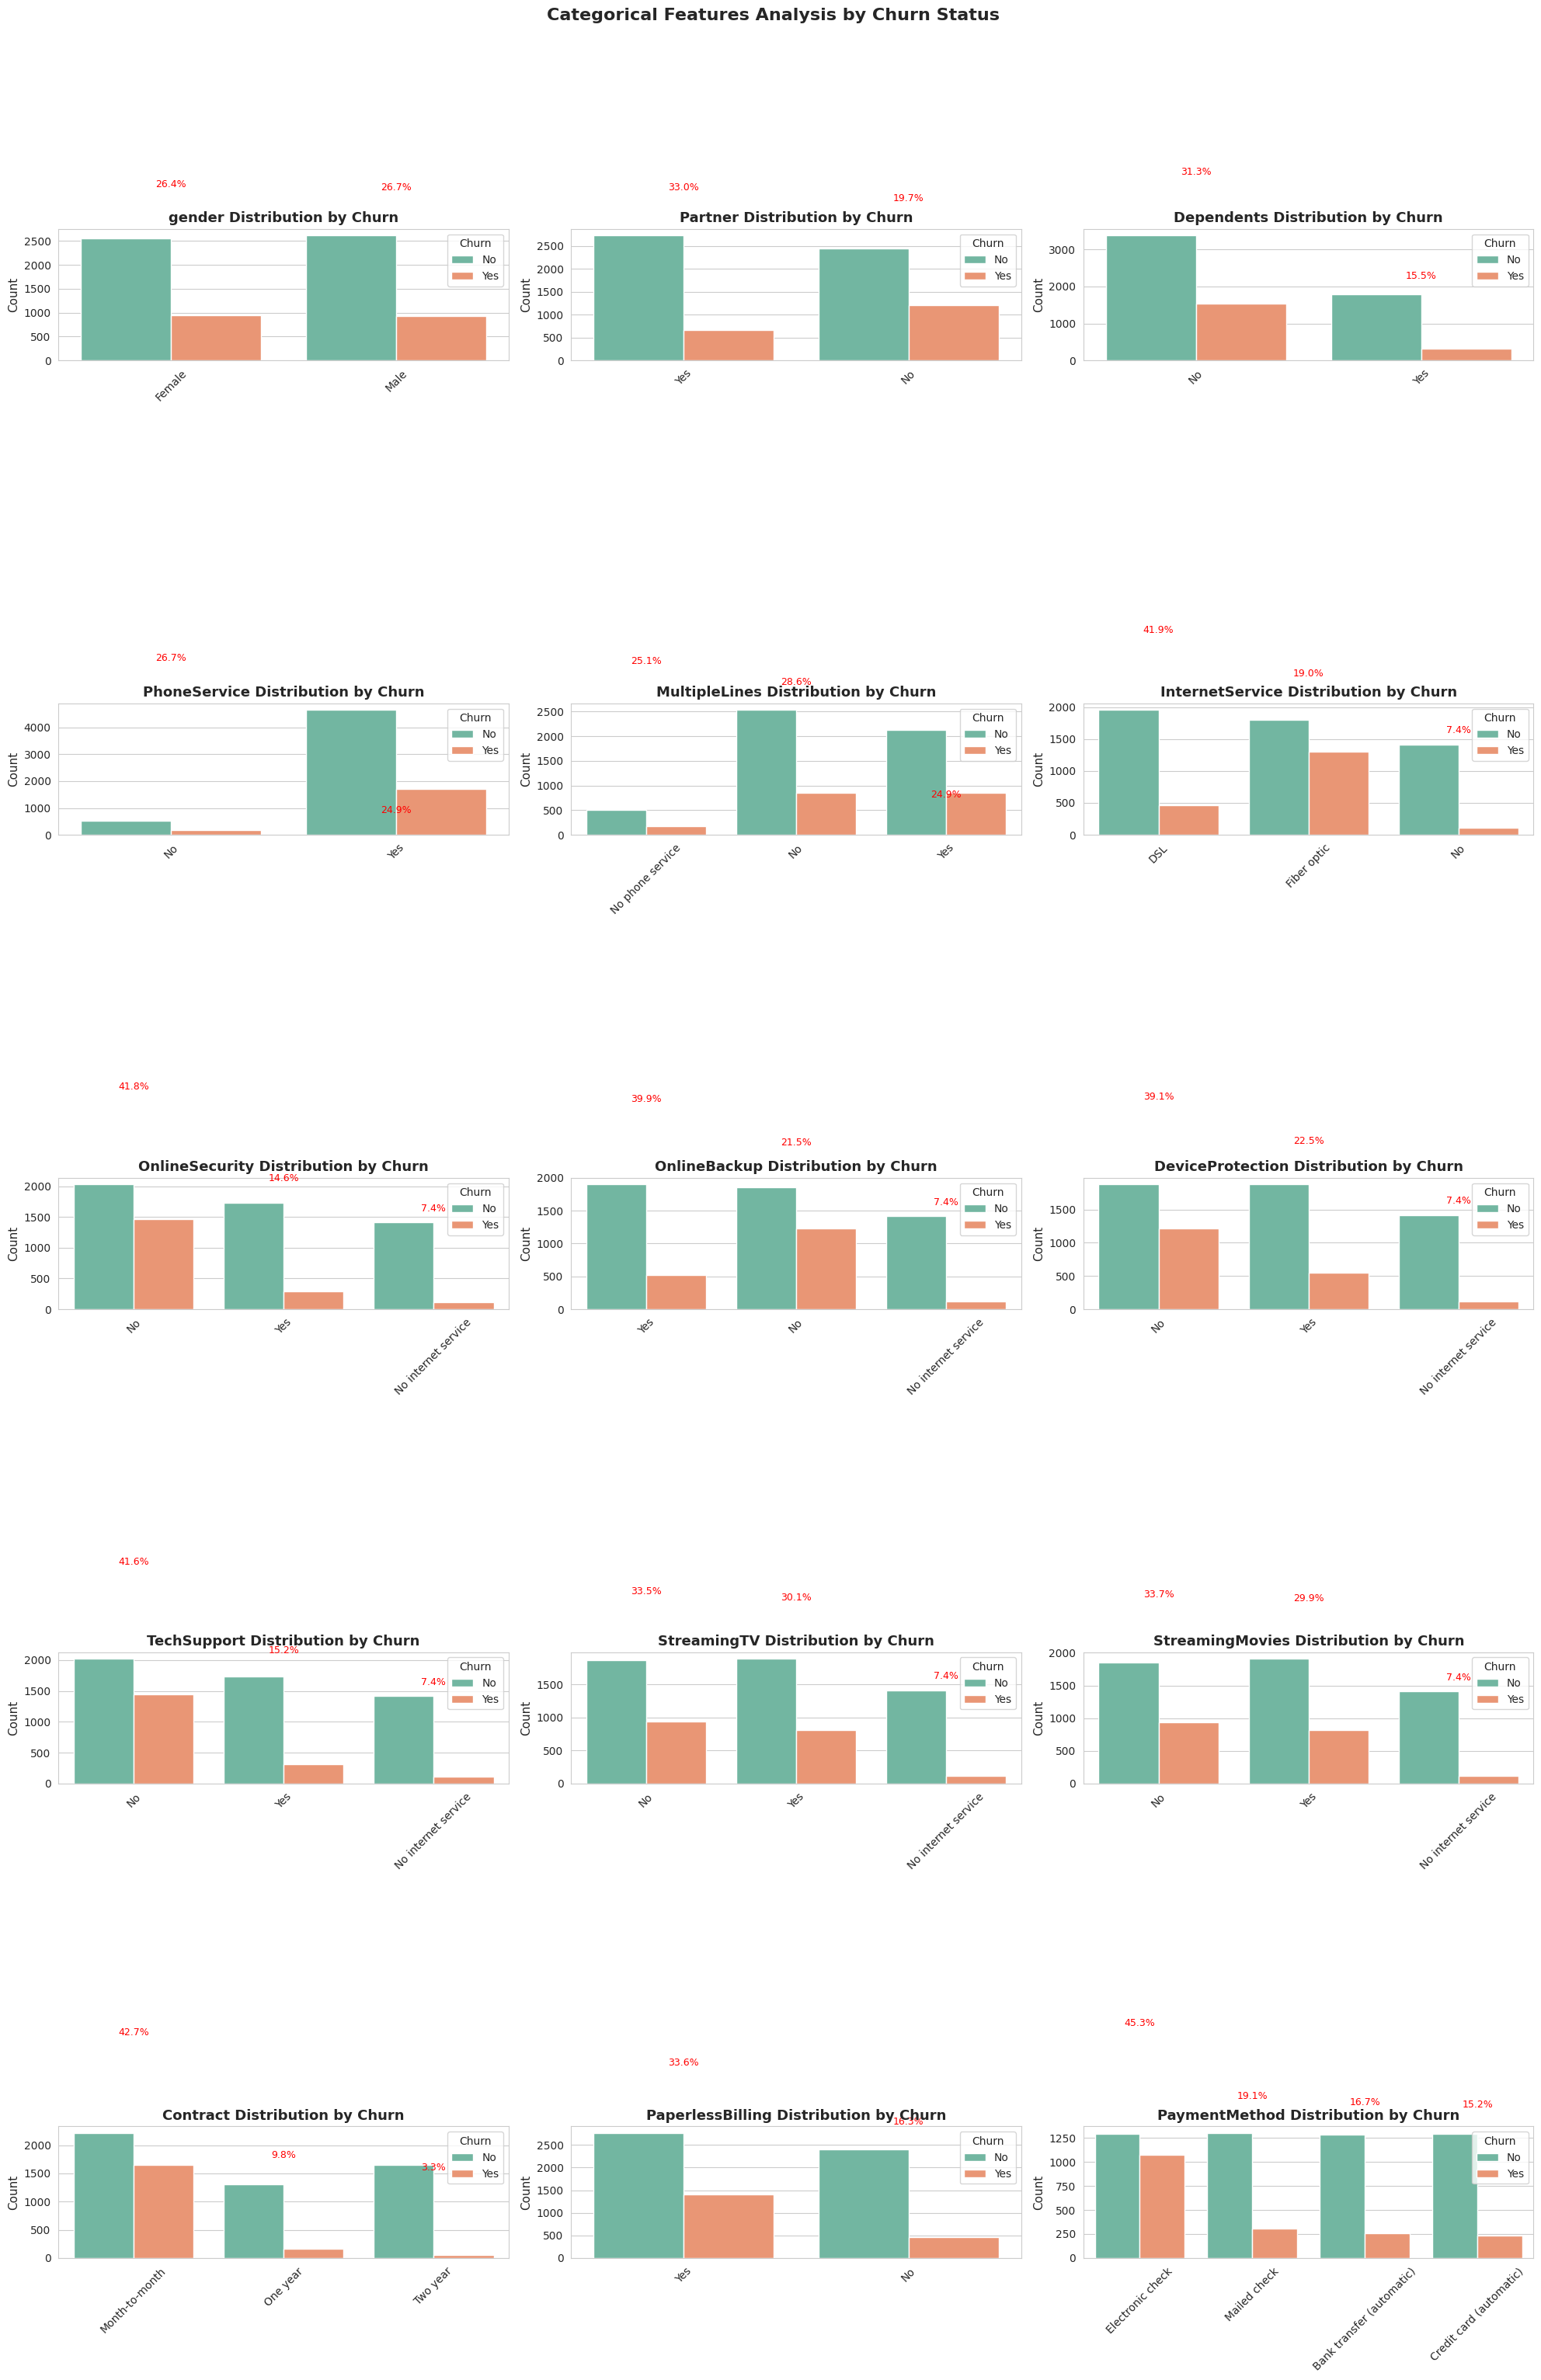

In [327]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create better layout (5 rows, 3 columns for 15 features)
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    # Create stacked bar plot
    ax = axes[idx]
    sns.countplot(data=df, x=col, hue='Churn', ax=ax, palette='Set2')

    # Formatting
    ax.set_title(f'{col} Distribution by Churn', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)

    # Add percentage annotations
    total_counts = df[col].value_counts()
    churn_counts = df[df['Churn'] == 'Yes'][col].value_counts()

    # Add churn rate on top
    for i, (total, churn) in enumerate(zip(total_counts, churn_counts)):
        churn_rate = (churn / total) * 100
        ax.text(i, total + max(total_counts)*0.02,
               f'{churn_rate:.1f}%', ha='center', fontsize=9, color='red')

plt.suptitle('Categorical Features Analysis by Churn Status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Pairplot the Numerical Columns

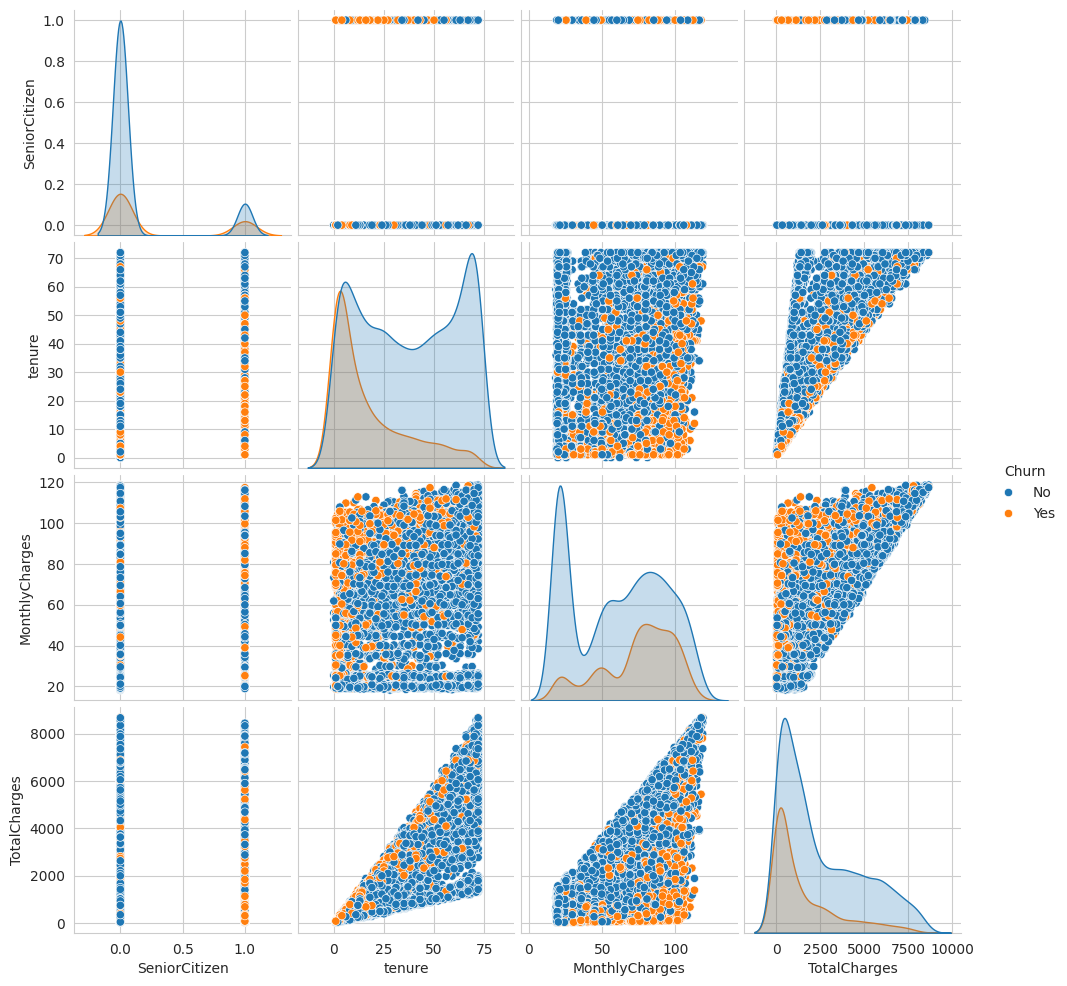

<Figure size 640x480 with 0 Axes>

In [328]:
# Select numerical columns for pairplot
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create pairplot with Churn as hue
sns.pairplot(df, hue='Churn')
plt.show()
plt.suptitle('Pairplot of Numerical Features by Churn Status',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Data Cleaning

In [329]:
# Before conversion: show problem rows
print("\nSample TotalCharges values (first 10):")
print(df["TotalCharges"].head(10).tolist())

# Convert TotalCharges to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("\nAfter conversion, NaNs in TotalCharges:", df["TotalCharges"].isna().sum())

# Show rows with NaN TotalCharges
if df["TotalCharges"].isna().sum() > 0:
    print("\nRows with missing TotalCharges (will display up to 10):")
    display(df[df["TotalCharges"].isna()].head(10))

# In original dataset there are 11 rows with blank TotalCharges (very small fraction)
df_clean = df.dropna(subset=["TotalCharges"]).copy()
print("\nShape after dropping rows with missing TotalCharges:", df_clean.shape)



Sample TotalCharges values (first 10):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95]

After conversion, NaNs in TotalCharges: 11

Rows with missing TotalCharges (will display up to 10):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No



Shape after dropping rows with missing TotalCharges: (7032, 21)


Convert Total Charges to numeirc

In [330]:
# Show DataFrame info
print("DATAFRAME INFO")
print("=" * 50)
print(f"Class: {type(df)}")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()

# Show columns and data types
print("COLUMNS SUMMARY:")
print("-" * 40)
for i, col in enumerate(df.columns):
    dtype = df[col].dtype
    non_null = df[col].count()
    print(f"{i:2}. {col:20} {non_null:>6} non-null   {str(dtype):>10}")

DATAFRAME INFO
Class: <class 'pandas.core.frame.DataFrame'>
Shape: 7043 rows, 21 columns

COLUMNS SUMMARY:
----------------------------------------
 0. customerID             7043 non-null       object
 1. gender                 7043 non-null       object
 2. SeniorCitizen          7043 non-null        int64
 3. Partner                7043 non-null       object
 4. Dependents             7043 non-null       object
 5. tenure                 7043 non-null        int64
 6. PhoneService           7043 non-null       object
 7. MultipleLines          7043 non-null       object
 8. InternetService        7043 non-null       object
 9. OnlineSecurity         7043 non-null       object
10. OnlineBackup           7043 non-null       object
11. DeviceProtection       7043 non-null       object
12. TechSupport            7043 non-null       object
13. StreamingTV            7043 non-null       object
14. StreamingMovies        7043 non-null       object
15. Contract               7043 non-null  

Target Variable Distribution

In [331]:
# 5. Check the target variable distribution
print("== TARGET VARIABLE DISTRIBUTION (CHURN) ==")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n== CHURN PERCENTAGES ==")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

== TARGET VARIABLE DISTRIBUTION (CHURN) ==
Churn
No     5174
Yes    1869
Name: count, dtype: int64

== CHURN PERCENTAGES ==
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


 VISUALIZE CHURN DISTRIBUTION

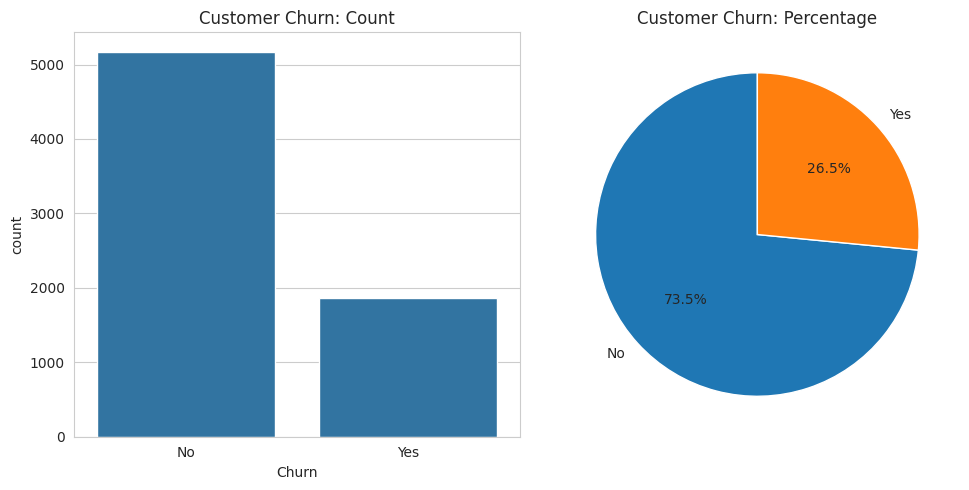

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [332]:
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

Percentage Bar

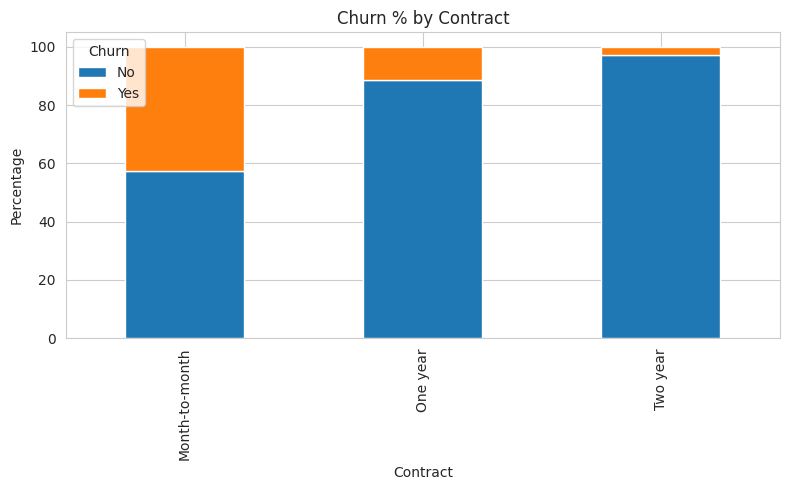

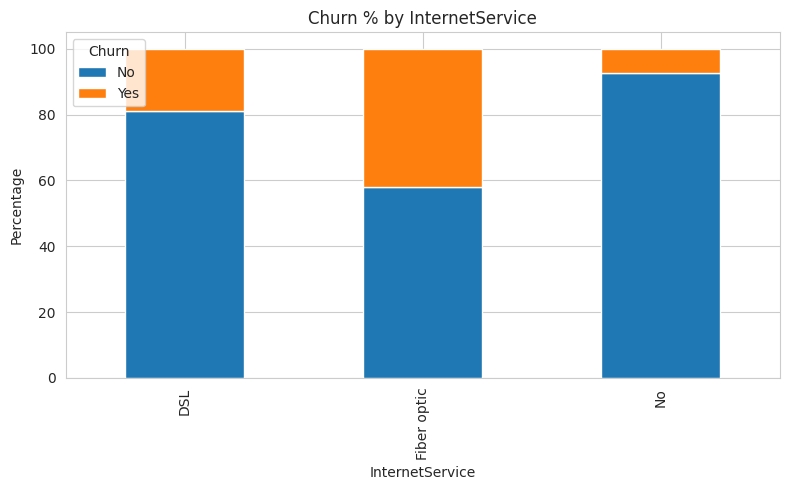

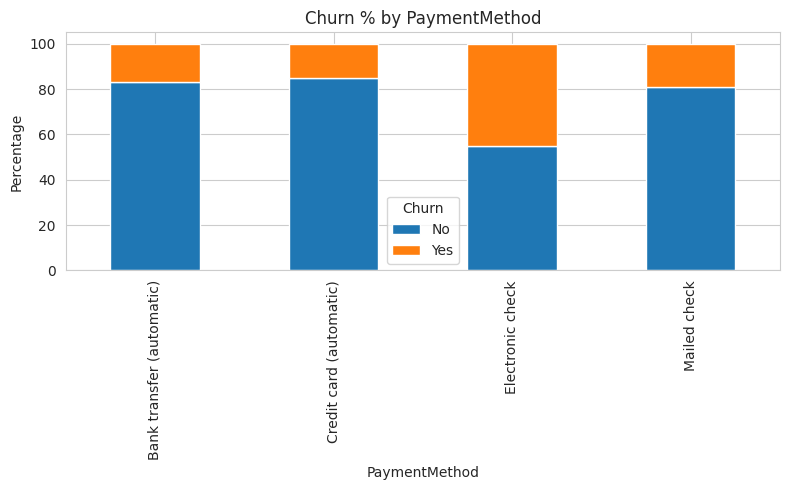

In [333]:
def stacked_percent_bar(col):
    ct = pd.crosstab(df_clean[col], df_clean["Churn"], normalize="index")*100
    ct = ct[["No","Yes"]] if "No" in ct.columns and "Yes" in ct.columns else ct
    ct.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(title="Churn")
    plt.ylabel("Percentage")
    plt.title(f"Churn % by {col}")
    plt.tight_layout()
    plt.show()

stacked_percent_bar("Contract")
stacked_percent_bar("InternetService")
stacked_percent_bar("PaymentMethod")

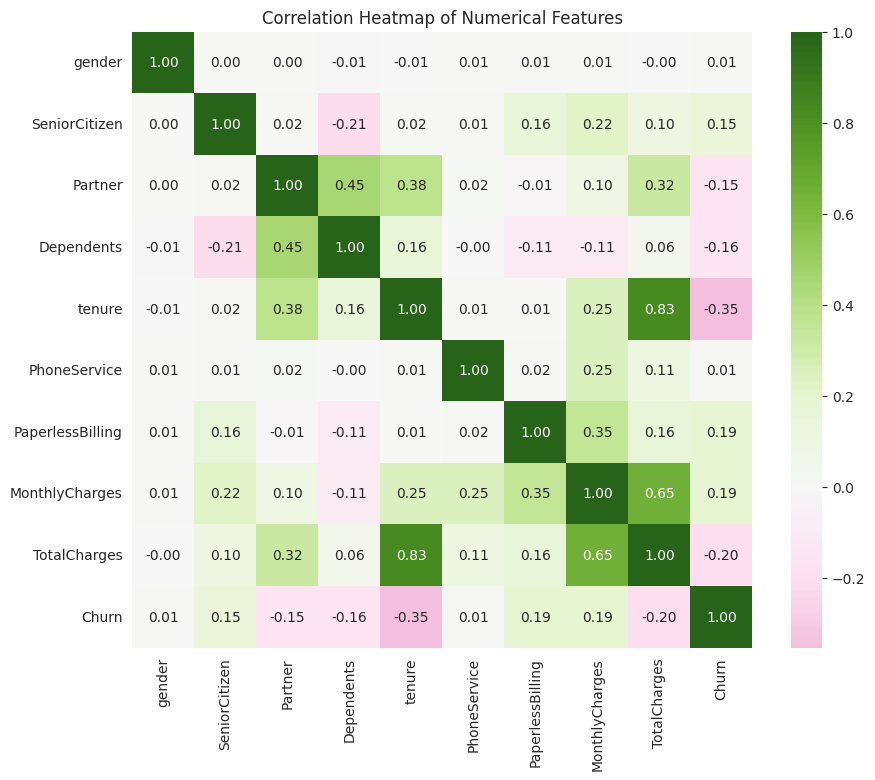

In [410]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Feature Importance Visualization

In [335]:
# === DATA QUALITY CHECK ===
print("== DATA QUALITY SUMMARY ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

== DATA QUALITY SUMMARY ==
Total missing values: 11
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
Pa

In [336]:
# Key Insights Summary
print("KEY INSIGHTS")
print("=" * 40)

# 1. Overall churn
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# 2. Churn by contract
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn by contract type:")
for contract, rate in contract_churn.sort_values().items():
    print(f"   {contract}: {rate:.1f}%")

# 3. Tenure difference
tenure_diff = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   Churned: {tenure_diff['Yes']:.1f} months")
print(f"   Stayed: {tenure_diff['No']:.1f} months")

# 4. Monthly charges difference
charges_diff = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   Churned: ${charges_diff['Yes']:.2f}")
print(f"   Stayed: ${charges_diff['No']:.2f}")

KEY INSIGHTS
1. Overall churn rate: 26.5%

2. Churn by contract type:
   Two year: 2.8%
   One year: 11.3%
   Month-to-month: 42.7%

3. Average tenure:
   Churned: 18.0 months
   Stayed: 37.6 months

4. Average monthly charges:
   Churned: $74.44
   Stayed: $61.27


Task **2**

Data pre prosseing

Drop Unsessary Columns (Customer ID)

In [337]:
# Drop the 'customerID' column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Verify
print(df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

Binary Encoding

Endcode Target Veriable

In [338]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(" Target variable encoded (Yes=1, No=0)")

 Target variable encoded (Yes=1, No=0)


In [339]:
binary = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Encode binary features
for col in binary:
    df[col] = df[col].map({
        'Yes': 1, 'No': 0,
        'Male': 0, 'Female': 1
    })

print(" Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).")


 Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).


One-Hot Endoding

In [340]:
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_features,drop_first=True)


df.apply(lambda x: x.unique())

,0
gender,"[1, 0]"
SeniorCitizen,"[0, 1]"
Partner,"[1, 0]"
Dependents,"[0, 1]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[0, 1]"
PaperlessBilling,"[1, 0]"
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."
Churn,"[0, 1]"


Feature Scalling

In [341]:
# Feature Scaling
# Check for any NaN values in the features to be scaled
feature_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Checking data quality before scaling:")
for col in feature_scaling:
    if col in df.columns:
        nan_count = df[col].isna().sum()
        print(f"{col}: {nan_count} NaN values")
# Handle any NaN values - use df_clean if available, otherwise use df
if 'df_clean' in locals():
    working_df = df_clean.copy()
    print("\nUsing cleaned dataframe (df_clean)")
else:
    working_df = df.copy()
    # Fill NaN values in numerical columns
    for col in feature_scaling:
        if col in working_df.columns and working_df[col].isna().sum() > 0:
            median_val = working_df[col].median()
            working_df[col] = working_df[col].fillna(median_val)
            print(f"Filled NaN values in {col} with median: {median_val}")

# Apply scaling
scaler = MinMaxScaler()
working_df[feature_scaling] = scaler.fit_transform(working_df[feature_scaling])


Checking data quality before scaling:
tenure: 0 NaN values
MonthlyCharges: 0 NaN values
TotalCharges: 11 NaN values

Using cleaned dataframe (df_clean)


Separate data into Featrues(DATA Split)

In [342]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

Training set size: (5634, 30)
Testing set size: (1409, 30)
Training class distribution: [4139 1495]
Testing class distribution: [1035  374]


In [343]:
# ============================
# Separate Features and Target
# ============================
X = df.drop('Churn', axis=1)
y = df['Churn']


In [344]:
print("\n" + "=" * 70)
print("DATA SUMMARY AFTER PREPROCESSING")
print("=" * 70)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

# ============================
# Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


DATA SUMMARY AFTER PREPROCESSING
Features shape: (7043, 30)
Target shape: (7043,)
Number of features: 30


Class imbalance handling (Using Smote)

In [345]:
print("\n" + "=" * 70)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("=" * 70)

print("Original training class distribution:")
print(y_train.value_counts())
print("\nAfter SMOTE:")



HANDLING CLASS IMBALANCE WITH SMOTE
Original training class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:


In [453]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# X_train
X_train_clean = X_train.fillna(0).astype('float32')

# y_train
if isinstance(y_train, pd.Series) and y_train.dtype == 'object':
    y_train_clean = y_train.map({'Yes': 1, 'No': 0}) if 'Yes' in str(y_train.iloc[0]) else y_train.astype('int32')
else:
    y_train_clean = y_train.astype('int32')

# Check class distribution before SMOTE
print("=== BEFORE SMOTE ===")
print(f"Original dataset shape: {X_train.shape}")
class_counts_before = pd.Series(y_train_clean).value_counts()
print(f"Class distribution:\n{class_counts_before}")


# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_clean, y_train_clean)

print(f"\n=== AFTER SMOTE ===")
print(f"SMOTE done! {X_train.shape[0]} → {X_train_res.shape[0]} samples")

# Check class distribution after SMOTE
class_counts_after = pd.Series(y_train_res).value_counts().sort_index()
print(f"Resampled dataset shape: {X_train_res.shape}")
print(f"Class distribution after SMOTE:\n{class_counts_after}")

# Calculate percentages after SMOTE
class_percentages_after = (class_counts_after / len(y_train_res) * 100).round(2)
print(f"Class percentages after SMOTE:\n{class_percentages_after}%")



=== BEFORE SMOTE ===
Original dataset shape: (5634, 30)
Class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

=== AFTER SMOTE ===
SMOTE done! 5634 → 8278 samples
Resampled dataset shape: (8278, 30)
Class distribution after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64
Class percentages after SMOTE:
Churn
0    50.0
1    50.0
Name: count, dtype: float64%


Visualize Smote

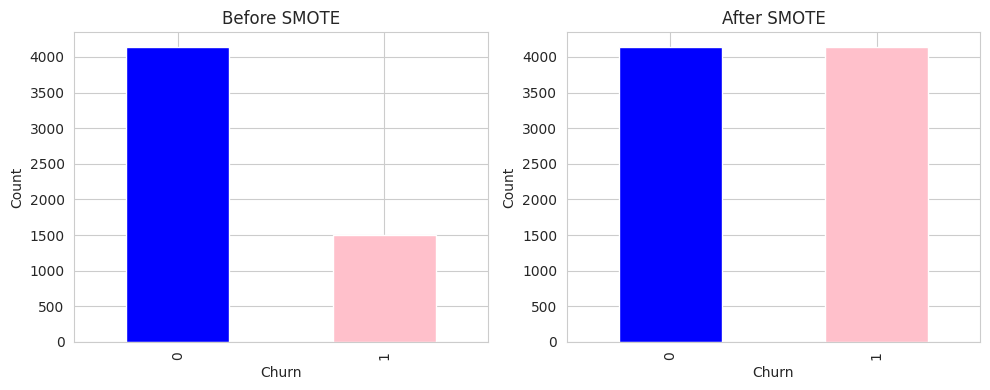

In [347]:
# Simple visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Before
pd.Series(y_train_clean).value_counts().plot(kind='bar', ax=ax1,
                                             color=['blue', 'pink'])
ax1.set_title('Before SMOTE')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')

# After
pd.Series(y_train_res).value_counts().plot(kind='bar', ax=ax2,
                                           color=['blue', 'pink'])
ax2.set_title('After SMOTE')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Model** **Training**

Decsision Tree

Baseline Decsision Tree Model

In [420]:
# Cell 1: Baseline Decision Tree Training

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)  # Use y_train_res (not Y_train_res)

# Predictions
prediction_test = dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, prediction_test)  # Use y_test (not Y_test)
print(f"Baseline Decision Tree Accuracy: {accuracy:.4f}")


Baseline Decision Tree Accuracy: 0.7246


Visulaize basic D **Tree**

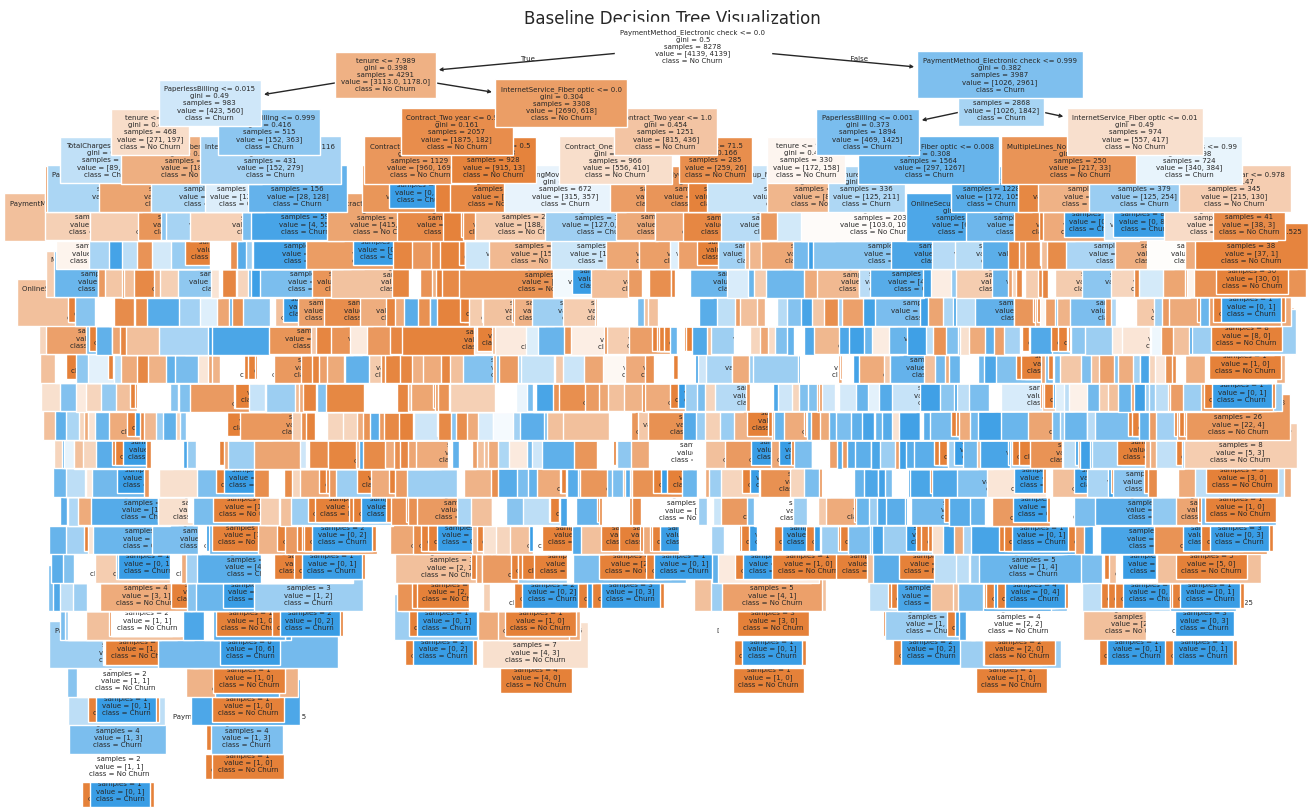

In [423]:
# Cell 2: Visualizing the Baseline Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the Decision Tree
plt.figure(figsize=(15,10))  # Increase the figure size for better clarity
plot_tree(dt, filled=True, feature_names=X_train_res.columns, class_names=['No Churn', 'Churn'], fontsize=5)
plt.title("Baseline Decision Tree Visualization")
plt.show()


Hyper Parameter tuning

Pruning tuning for Decsison tree


In [446]:
 #Pruning the Decision Tree

# Get pruning alphas (cost-complexity pruning path)
path = dt.cost_complexity_pruning_path(X_train_res, y_train_res)  # Use y_train_res
ccp_alphas = path.ccp_alphas

# List to store all pruned trees
models = []

# Train pruned trees for each alpha value
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train_res, y_train_res)  # Use y_train_res
    models.append(pruned_tree)

# Evaluate all pruned models
train_acc = []
test_acc = []
test_auc = []

for model in models:
    train_acc.append(accuracy_score(y_train_res, model.predict(X_train_res)))  # Use y_train_res
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))  # Use y_test
    y_prob = model.predict_proba(X_test)[:, 1]
    test_auc.append(roc_auc_score(y_test, y_prob))  # Use y_test

# Select the best model (based on AUC score)
best_index = test_auc.index(max(test_auc))

# Print details for the best pruned model
print("Best alpha:", ccp_alphas[best_index])
print("Train Accuracy:", train_acc[best_index])
print("Test Accuracy:", test_acc[best_index])
print("ROC AUC:", test_auc[best_index])


Best alpha: 0.0005889656771512291
Train Accuracy: 0.8576950954336796
Test Accuracy: 0.7771469127040455
ROC AUC: 0.8223035986463096


In [447]:
 #Final Best Pruned Decision Tree Training

# Train the best pruned tree with the best alpha
best_pruning_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[best_index])
best_pruning_tree.fit(X_train_res, y_train_res)  # Use y_train_res

# Model details
print(best_pruning_tree)


DecisionTreeClassifier(ccp_alpha=np.float64(0.0005889656771512291),
                       random_state=42)


Pruned DT visualization

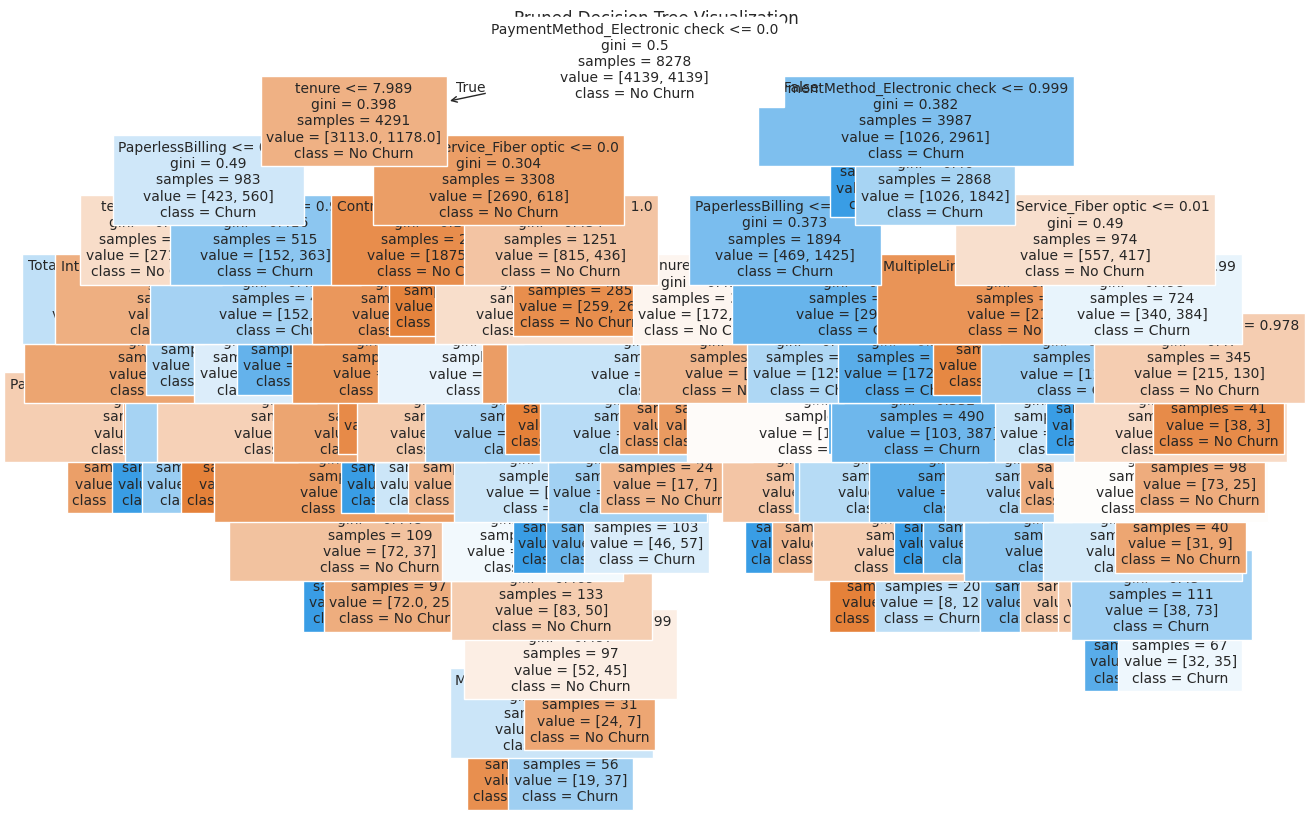

In [429]:


# Visualizing the final pruned decision tree
plt.figure(figsize=(15,10))
plot_tree(best_pruning_tree, filled=True, feature_names=X_train_res.columns, class_names=['No Churn', 'Churn'], fontsize=10)
plt.title("Pruned Decision Tree Visualization")
plt.show()


ROC Curve

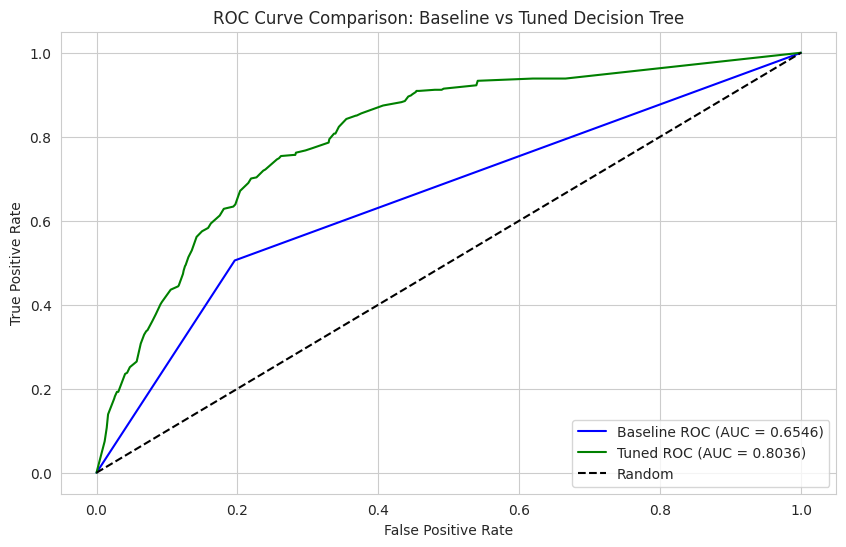

In [439]:
# For the baseline model
y_pred_proba_baseline = dt.predict_proba(X_test)[:, 1]  # Get probability of positive class (churn)

# For the tuned (pruned) model
y_pred_proba_tuned = dt_best.predict_proba(X_test)[:, 1]  # Same for the tuned model



# ROC Curve for Baseline Model
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

# ROC Curve for Tuned Model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# Plotting ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline ROC (AUC = {roc_auc_baseline:.4f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC (AUC = {roc_auc_tuned:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Baseline vs Tuned Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Confusion Matrix

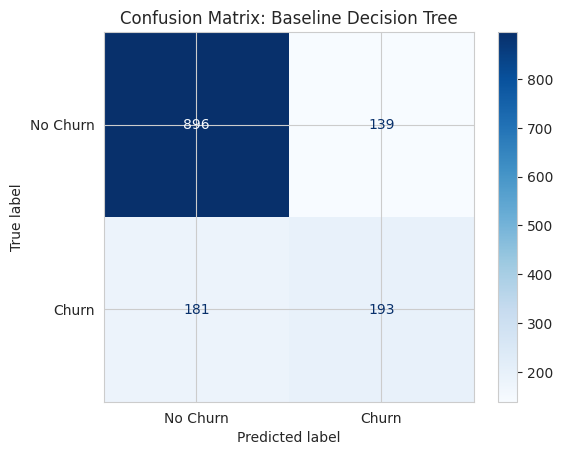

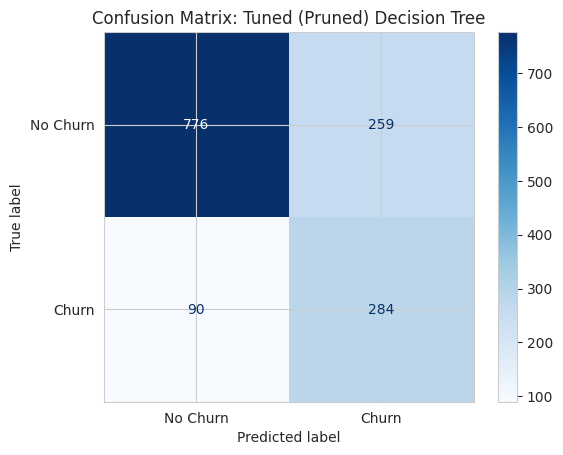

In [436]:
# Confusion Matrix for Baseline Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for baseline
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_display_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['No Churn', 'Churn'])
cm_display_baseline.plot(cmap='Blues')
plt.title('Confusion Matrix: Baseline Decision Tree')
plt.show()

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_display_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No Churn', 'Churn'])
cm_display_tuned.plot(cmap='Blues')
plt.title('Confusion Matrix: Tuned (Pruned) Decision Tree')
plt.show()


Feature Importance Plot

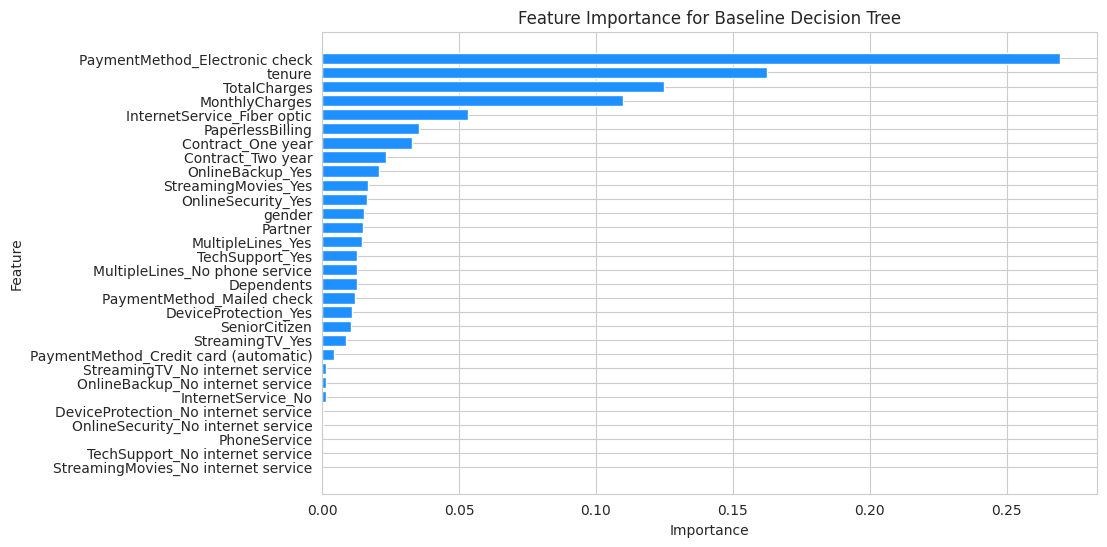

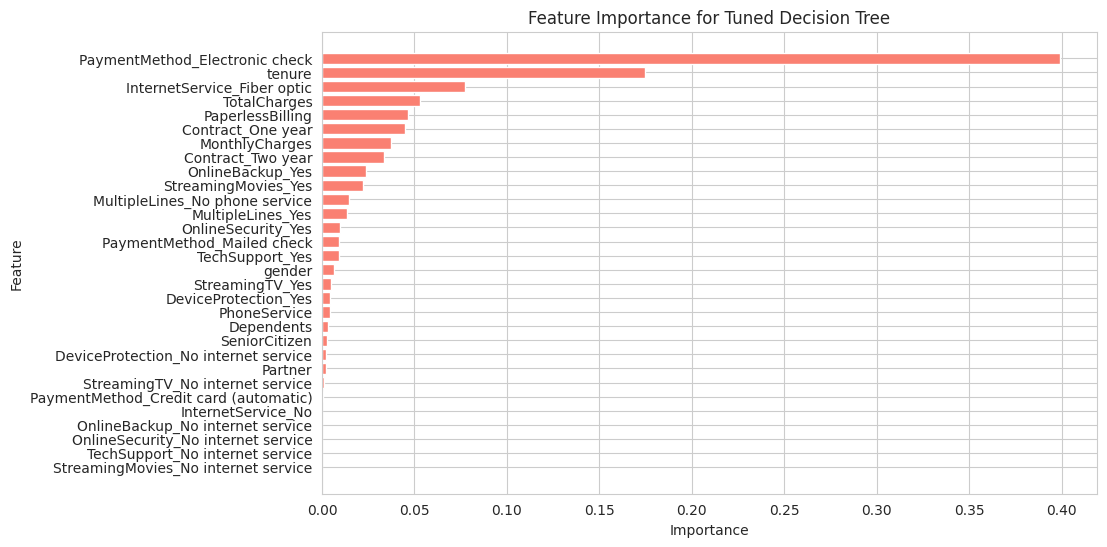

In [445]:
# Feature Importance for Baseline Model
feature_importance_baseline = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting Feature Importance for the Baseline Model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_baseline['Feature'], feature_importance_baseline['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Baseline Decision Tree')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()

# Feature Importance for Tuned Model
feature_importance_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

# Plotting Feature Importance for the Tuned Model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_tuned['Feature'], feature_importance_tuned['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned Decision Tree')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


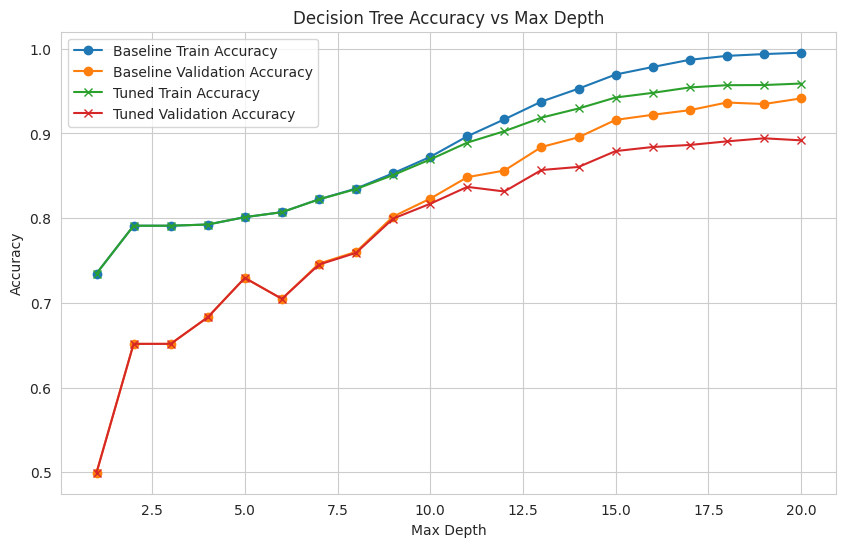

In [448]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Depth values ranging from 1 to 20
max_depths = list(range(1, 21))

# Lists to store accuracies
train_acc_baseline = []
val_acc_baseline = []

train_acc_tuned = []
val_acc_tuned = []

# Baseline model: no tuning, just max_depth variation
for depth in max_depths:
    # Create a baseline model with a specific max_depth
    model_baseline = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_baseline.fit(X_train, y_train)

    # Store training and validation accuracies
    train_acc_baseline.append(accuracy_score(y_train, model_baseline.predict(X_train)))
    val_acc_baseline.append(accuracy_score(y_val, model_baseline.predict(X_val)))

# Tuned model: using max_depth and min_samples_split=5
for depth in max_depths:
    # Create a tuned model with a specific max_depth and min_samples_split
    model_tuned = DecisionTreeClassifier(max_depth=depth, min_samples_split=5, random_state=42)
    model_tuned.fit(X_train, y_train)

    # Store training and validation accuracies
    train_acc_tuned.append(accuracy_score(y_train, model_tuned.predict(X_train)))
    val_acc_tuned.append(accuracy_score(y_val, model_tuned.predict(X_val)))

# Plotting the accuracy vs max_depth for both models
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies for baseline
plt.plot(max_depths, train_acc_baseline, label='Baseline Train Accuracy', marker='o', color='dodgerblue')
plt.plot(max_depths, val_acc_baseline, label='Baseline Validation Accuracy', marker='o', color='lightblue')

# Plot training and validation accuracies for tuned model
plt.plot(max_depths, train_acc_tuned, label='Tuned Train Accuracy', marker='x', color='salmon')
plt.plot(max_depths, val_acc_tuned, label='Tuned Validation Accuracy', marker='x', color='darkred')

# Title and labels
plt.title('Decision Tree Accuracy vs Max Depth', fontsize=16)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Summery of Decsision Tree

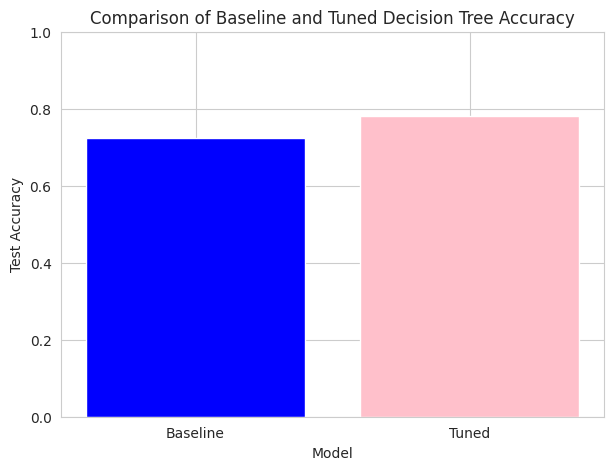

In [449]:
# Accuracy Bar Chart for Baseline and Tuned Models
import matplotlib.pyplot as plt

# Define metrics and accuracies
metrics = ['Accuracy']
baseline_acc = [test_acc_baseline]
tuned_acc = [test_acc_tuned]

# Plotting the accuracy comparison
plt.figure(figsize=(7,5))
plt.bar(['Baseline', 'Tuned'], [test_acc_baseline, test_acc_tuned], color=['blue', 'pink'])
plt.title('Comparison of Baseline and Tuned Decision Tree Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.show()


Nurel Network Model

Baseline Nurel Netowrk Model

In [393]:
# ============================================================
#                 BASELINE NEURAL NETWORK
# ============================================================

def build_baseline_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.4),

        Dense(32, activation='relu'),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])
    return model

print("\n=== TRAINING BASELINE MODEL ===")

input_shape = (X_train_res.shape[1],)
baseline_model = build_baseline_model(input_shape)

baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

baseline_es = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True,
    verbose=1
)

history_baseline = baseline_model.fit(
    X_train_res, y_train_res,
    validation_data=(X_val, y_val),
    epochs=40,          # weaker → target 70–73% accuracy
    batch_size=64,
    callbacks=[baseline_es],
    verbose=1
)



=== TRAINING BASELINE MODEL ===
Epoch 1/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5139 - loss: 72.3793 - val_accuracy: 0.5996 - val_loss: 16.1718
Epoch 2/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5658 - loss: 16.4454 - val_accuracy: 0.5006 - val_loss: 1.1726
Epoch 3/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5722 - loss: 4.2704 - val_accuracy: 0.5018 - val_loss: 0.6965
Epoch 4/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5458 - loss: 1.4698 - val_accuracy: 0.5803 - val_loss: 0.6850
Epoch 5/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5593 - loss: 0.9355 - val_accuracy: 0.5876 - val_loss: 0.6803
Epoch 6/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5439 - loss: 0.8415 - val_accuracy: 0.5749 - val_loss: 0.6830
Epoch 7/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5575 - loss: 0.7962 - val_accuracy: 0.5906 - val_loss: 0.6744
Epoch 8/40
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.54

In [394]:
print("\n=== BASELINE MODEL EVALUATION ===")

val_loss, val_acc = baseline_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = baseline_model.evaluate(X_test, y_test, verbose=0)

print(f"Baseline Validation Accuracy: {val_acc:.4f}")
print(f"Baseline Test Accuracy:       {test_acc:.4f}")



=== BASELINE MODEL EVALUATION ===
Baseline Validation Accuracy: 0.6781
Baseline Test Accuracy:       0.7630


In [357]:
# ============================================================
#          BUILD TUNER MODEL
# ============================================================

def build_tuned_model(hp):
    model = Sequential()

    # Layer 1: Big Layer
    model.add(Dense(
        hp.Int("units1", 128, 512, step=64),
        activation="relu",
        input_shape=(X_train_res.shape[1],)
    ))
    model.add(Dropout(hp.Float("drop1", 0.1, 0.4, step=0.1)))

    # Layer 2: Medium Layer
    model.add(Dense(
        hp.Int("units2", 64, 256, step=32),
        activation="relu"
    ))
    model.add(Dropout(hp.Float("drop2", 0.1, 0.3, step=0.1)))

    # Optional Layer 3
    if hp.Boolean("add_layer3"):
        model.add(Dense(
            hp.Int("units3", 32, 128, step=32),
            activation="relu"
        ))
        model.add(Dropout(hp.Float("drop3", 0.05, 0.2, step=0.05)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Low learning rate = stable accuracy
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("lr", [0.001, 0.0005])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [369]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

print("\n=== QUICK HYPERPARAMETER SEARCH ===")

# SIMPLE MODEL FUNCTION
def build_simple_model(hp):
    model = tf.keras.Sequential()

    # Only 1-2 layers to make it fast
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=64, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train_res.shape[1],)
    ))
    model.add(tf.keras.layers.Dropout(0.3))

    # Optional small layer
    if hp.Boolean('add_layer2'):
        model.add(tf.keras.layers.Dense(32, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Fixed learning rate (faster convergence)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# SIMPLE TUNER - SMALL SEARCH
tuner = kt.RandomSearch(
    build_simple_model,
    objective='val_accuracy',
    max_trials=3,          # ONLY 3 TRIALS (FAST!)
    executions_per_trial=1,
    directory='fast_tuning',
    project_name='churn_fast'
)

# EARLY STOPPING
es = EarlyStopping(
    monitor='val_loss',
    patience=5,           # Stop quickly if no improvement
    restore_best_weights=True
)

print("Starting 3 quick trials (this will be fast)...")

# QUICK TRAINING
tuner.search(
    X_train_res, y_train_res,
    validation_data=(X_val, y_val),
    epochs=30,            # Fewer epochs
    batch_size=32,
    callbacks=[es],
    verbose=1
)

print("\n Tuning complete!")
best_model = tuner.get_best_models(num_models=1)[0]

# Train tuned model for a few epochs just to get history
history_tuned = best_model.fit(
    X_train_res, y_train_res,
    validation_data=(X_val, y_val),
    epochs=10,  # small number for plotting
    batch_size=32,
    verbose=1
)

# CHECK BEST HP
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest hyperparameters found:")
print(f"  Units: {best_hp.get('units')}")
print(f"  Add second layer: {best_hp.get('add_layer2')}")

# QUICK TEST
loss, acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {acc:.4f} ({acc*100:.1f}%)")


=== QUICK HYPERPARAMETER SEARCH ===
Reloading Tuner from fast_tuning/churn_fast/tuner0.json
Starting 3 quick trials (this will be fast)...

 Tuning complete!
Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6528 - loss: 4.3226 - val_accuracy: 0.7234 - val_loss: 0.5561
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6899 - loss: 0.7683 - val_accuracy: 0.7446 - val_loss: 0.5226
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6983 - loss: 0.6098 - val_accuracy: 0.7319 - val_loss: 0.5298
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7052 - loss: 0.5807 - val_accuracy: 0.7331 - val_loss: 0.5224
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 0.5564 - val_accuracy: 0.7307 - val_loss: 0.5363
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7284 - loss: 0.5428 - val_accuracy: 0.7264 - val_loss: 0.5627
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7326 - 

In [359]:
print("\n=== TUNED MODEL EVALUATION ===")

tuned_val_loss, tuned_val_acc = best_model.evaluate(X_val, y_val, verbose=0)
tuned_test_loss, tuned_test_acc = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Tuned Validation Accuracy: {tuned_val_acc:.4f}")
print(f"Tuned Test Accuracy:       {tuned_test_acc:.4f}")



=== TUNED MODEL EVALUATION ===
Tuned Validation Accuracy: 0.7011
Tuned Test Accuracy:       0.7722


In [396]:
# ============================================================
#                   MODEL COMPARISON
# ============================================================

print("\n" + "="*60)
print("           BASELINE VS TUNED MODEL")
print("="*60)

print(f"{'Metric':<25}{'Baseline':<15}{'Tuned':<15}{'Improvement'}")
print("-"*60)
print(f"{'Validation Accuracy':<25}{val_acc:.4f}{' ' * 10}{tuned_val_acc:.4f}{' ' * 10}{tuned_val_acc - val_acc:+.4f}")
print(f"{'Test Accuracy':<25}{test_acc:.4f}{' ' * 10}{tuned_test_acc:.4f}{' ' * 10}{tuned_test_acc - test_acc:+.4f}")

if tuned_test_acc > test_acc:
    print("\n Tuned model OUTPERFORMED the baseline.")
else:
    print("\n Tuned model did NOT beat the baseline.")



           BASELINE VS TUNED MODEL
Metric                   Baseline       Tuned          Improvement
------------------------------------------------------------
Validation Accuracy      0.6781          0.7011          +0.0229
Test Accuracy            0.7630          0.7722          +0.0092

 Tuned model OUTPERFORMED the baseline.


Comparison Visualization

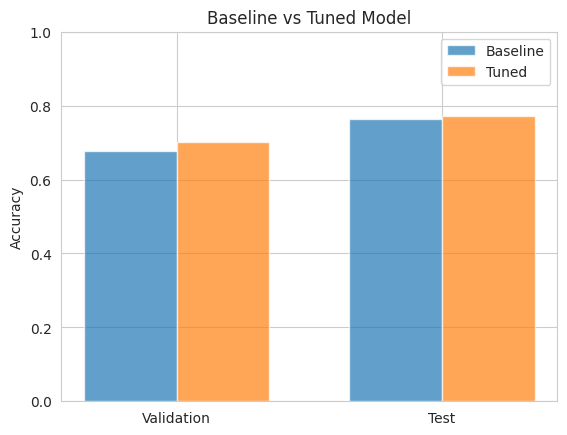

In [397]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Validation', 'Test']
baseline = [val_acc, test_acc]
tuned = [tuned_val_acc, tuned_test_acc]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # width of the bars

plt.bar(x - width/2, baseline, width, label='Baseline', alpha=0.7)
plt.bar(x + width/2, tuned, width, label='Tuned', alpha=0.7)

plt.ylabel('Accuracy')
plt.title('Baseline vs Tuned Model')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()


ROC Curve

In [380]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score

def plot_nn_results(model, history, X_test, y_test, model_name="NN Model"):
    """
    Plot NN results: loss, accuracy, confusion matrix, ROC curve
    Handles NaN/inf values in X_test or y_test automatically.
    """
    mask = ~np.isnan(X_test).any(axis=1) & ~np.isinf(X_test).any(axis=1) & ~np.isnan(y_test) & ~np.isinf(y_test)
    X_test_clean = X_test[mask]
    y_test_clean = y_test[mask]
    y_pred_prob = model.predict(X_test_clean)
    y_pred_prob = np.array(y_pred_prob).flatten()  # Ensure 1D

    y_pred = (y_pred_prob >= 0.5).astype(int)

    # -----------------------------
    # Plot Loss & Accuracy
    # -----------------------------
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history.get('val_loss', []), label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Confusion Matrix
    # -----------------------------
    cm = confusion_matrix(y_test_clean, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test_clean, y_pred):.4f}")
    print(f"{model_name} - Confusion Matrix:\n{cm}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # -----------------------------
    # ROC Curve
    # -----------------------------

    fpr, tpr, _ = roc_curve(y_test_clean, y_pred_prob)
    auc = roc_auc_score(y_test_clean, y_pred_prob)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.3f})')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


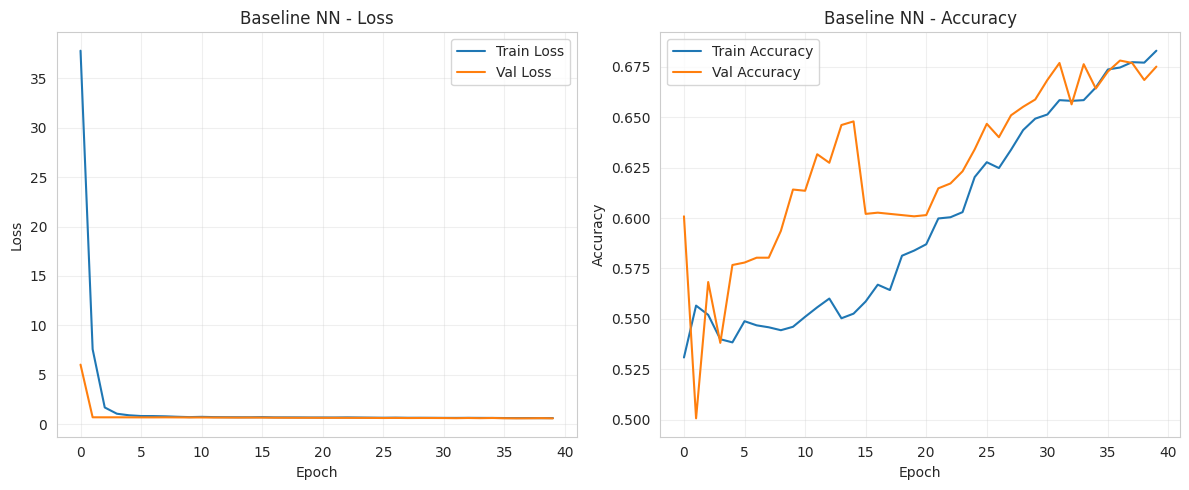


Baseline NN - Accuracy: 0.7724
Baseline NN - Confusion Matrix:
[[893 139]
 [181 193]]


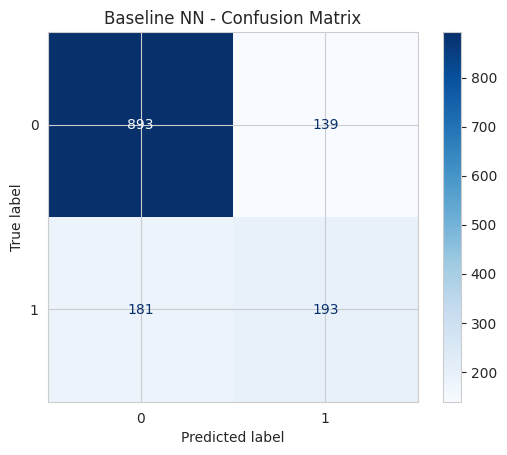

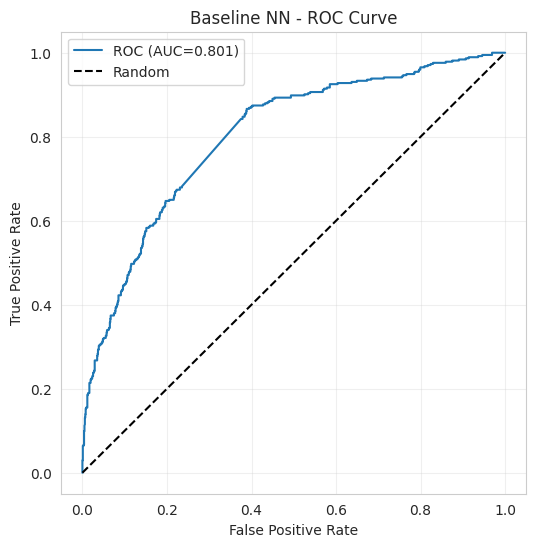

In [367]:
plot_nn_results(baseline_model, history_baseline, X_test, y_test, model_name="Baseline NN")


In [406]:
import matplotlib.pyplot as plt

def plot_nn_accuracy(history, model_name="Neural Network"):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10,6))
    plt.plot(epochs, history.history['accuracy'], 'o-', label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'o-', label='Validation Accuracy')

    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()



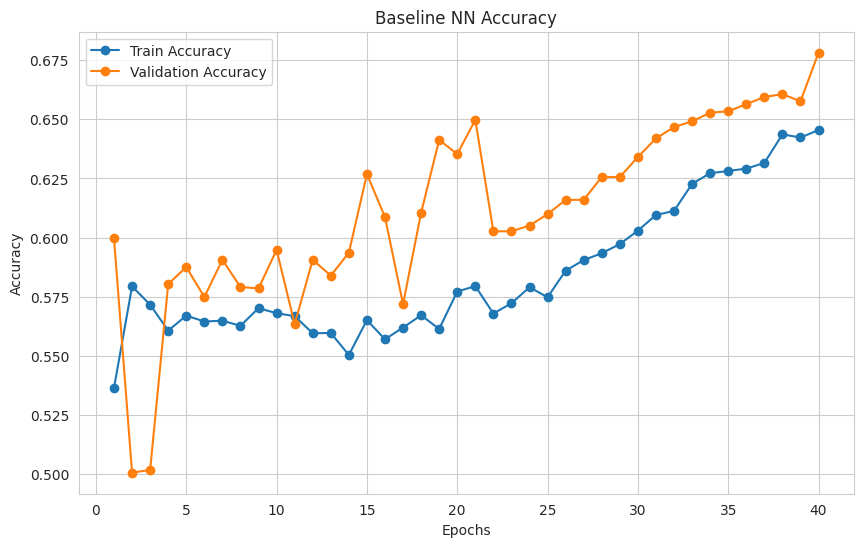

In [407]:
plot_nn_accuracy(history_baseline, "Baseline NN")

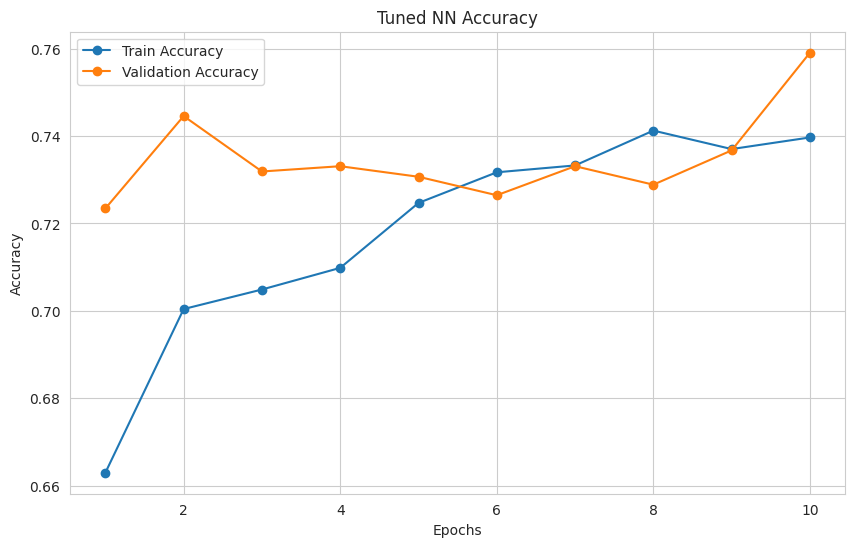

In [408]:
plot_nn_accuracy(history_tuned, "Tuned NN")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


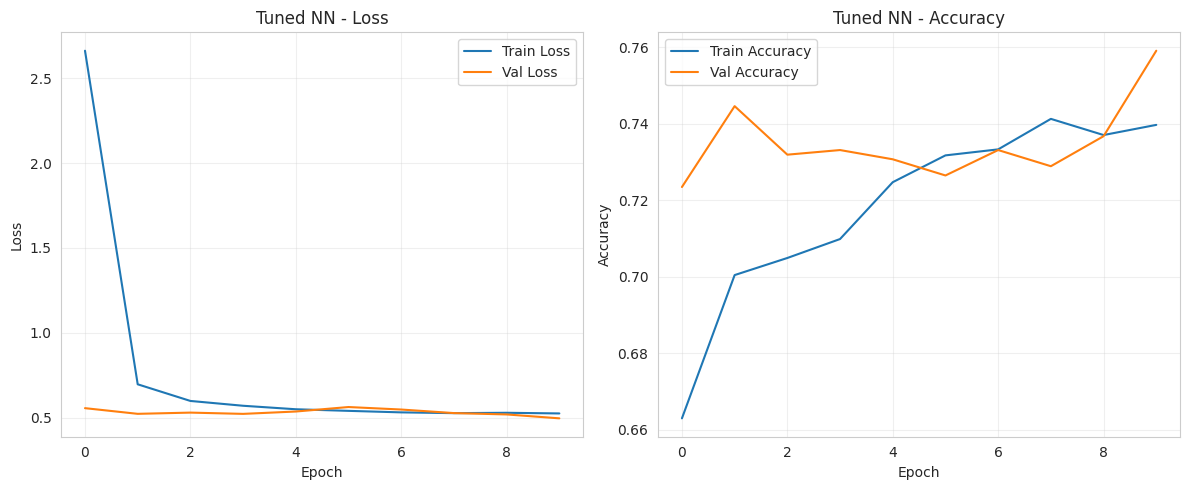


Tuned NN - Accuracy: 0.7518
Tuned NN - Confusion Matrix:
[[773 259]
 [ 90 284]]


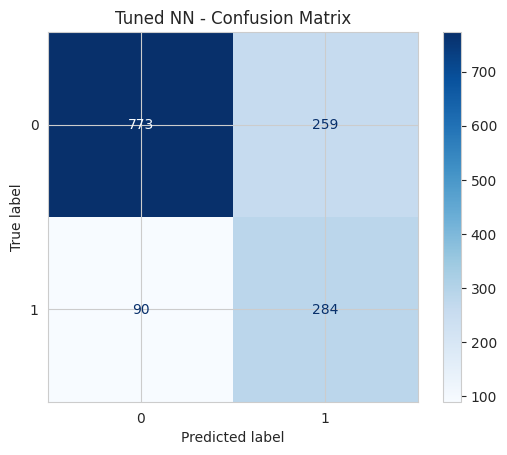

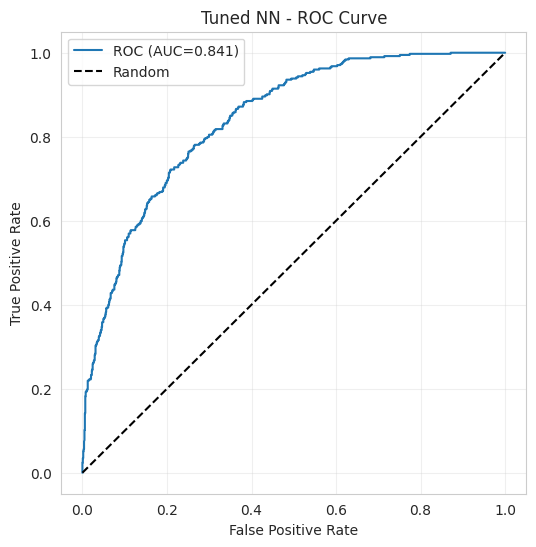

In [458]:

# ROC Curve and Confusion Matrix for Tuned Neural Network

def plot_nn_results_tuned(model, history, X_test, y_test, model_name="Tuned NN"):
    """
    Plot results for Tuned Neural Network model: loss, accuracy, confusion matrix, ROC curve
    """
    mask = ~np.isnan(X_test).any(axis=1) & ~np.isinf(X_test).any(axis=1) & ~np.isnan(y_test) & ~np.isinf(y_test)
    X_test_clean = X_test[mask]
    y_test_clean = y_test[mask]
    y_pred_prob = model.predict(X_test_clean)
    y_pred_prob = np.array(y_pred_prob).flatten()  # Ensure 1D

    y_pred = (y_pred_prob >= 0.5).astype(int)





44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


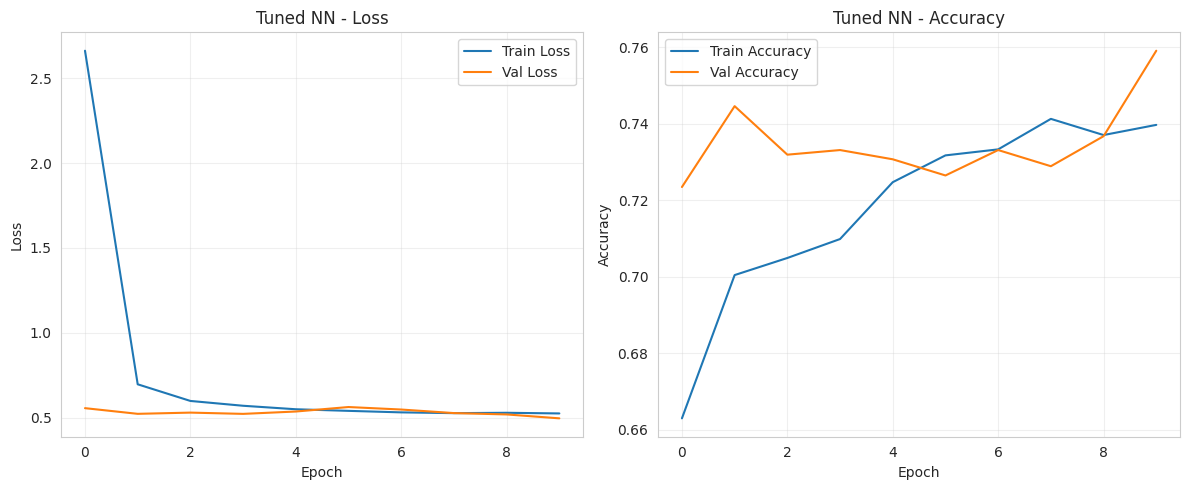


Tuned NN - Accuracy: 0.7518
Tuned NN - Confusion Matrix:
[[773 259]
 [ 90 284]]


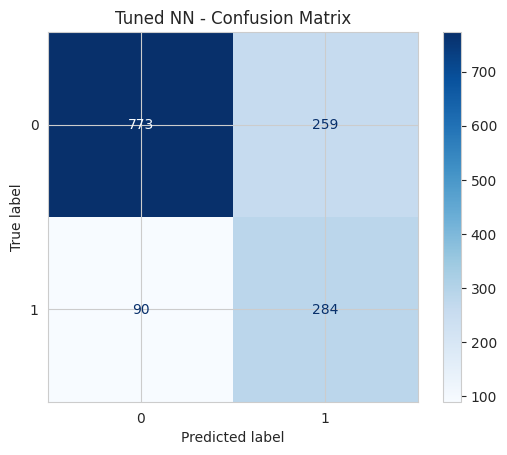

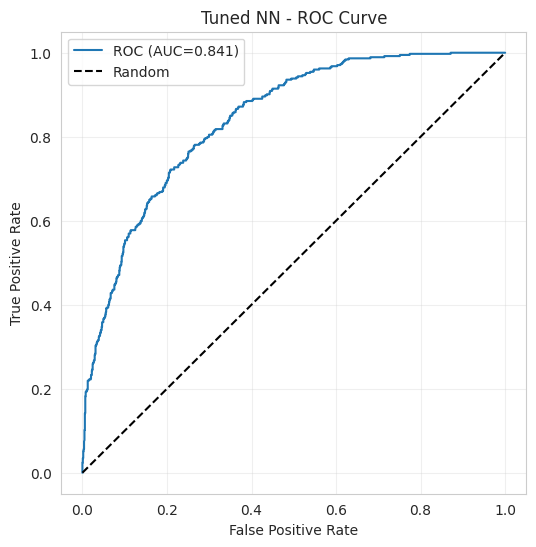

In [460]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ROC Curve and Confusion Matrix for Tuned Neural Network

def plot_nn_results_tuned(model, history, X_test, y_test, model_name="Tuned NN"):
    """
    Plot results for Tuned Neural Network model: loss, accuracy, confusion matrix, ROC curve
    """
    mask = ~np.isnan(X_test).any(axis=1) & ~np.isinf(X_test).any(axis=1) & ~np.isnan(y_test) & ~np.isinf(y_test)
    X_test_clean = X_test[mask]
    y_test_clean = y_test[mask]
    y_pred_prob = model.predict(X_test_clean)
    y_pred_prob = np.array(y_pred_prob).flatten()  # Ensure 1D

    y_pred = (y_pred_prob >= 0.5).astype(int)

    # -----------------------------
    # Plot Loss & Accuracy
    # -----------------------------
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history.get('val_loss', []), label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Confusion Matrix
    # -----------------------------
    cm = confusion_matrix(y_test_clean, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test_clean, y_pred):.4f}")
    print(f"{model_name} - Confusion Matrix:\n{cm}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # -----------------------------
    # ROC Curve
    # -----------------------------
    fpr, tpr, _ = roc_curve(y_test_clean, y_pred_prob)
    auc = roc_auc_score(y_test_clean, y_pred_prob)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.3f})')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Now, call the function to visualize results for Tuned NN Model
plot_nn_results_tuned(best_model, history_tuned, X_test, y_test, model_name="Tuned NN")
